In [1]:
import pandas as pd
import numpy as np

# Naive Bayes Classifier for Categorical variables

## Learning Data Set

Consider this (fictitious) table that we will use to predict whether a city will experience a traffic jam
or not. 

| Weather | Day of the week | Time of day | Traffic jam |
| ------- | --------------- | ----------- | ----------- |
|'Clear'  | 'Workday'       |'Morning'    |'Yes'|
|'Clear'  | 'Workday'       |'Lunch'      |'No'|
|'Clear'  | 'Workday'       |'Evening'    |'Yes'|
|'Clear'  | 'Weekend'       |'Morning'    |'No'|
|'Clear'  | 'Weekend'       |'Lunch'      |'No'|
|'Clear'  | 'Weekend'       |'Evening'    |'No'|
|'Rainy'  | 'Workday'       |'Morning'    |'Yes'|
|'Rainy'  | 'Workday'       |'Lunch'      |'Yes'|
|'Rainy'  | 'Workday'       |'Evening'    |'Yes'|
|'Rainy'  | 'Weekend'       |'Morning'    |'No'|
|'Rainy'  | 'Weekend'       |'Lunch'      |'No'|
|'Rainy'  | 'Weekend'       |'Evening'    |'No'|
|'Snowy'  | 'Workday'       |'Morning'    |'Yes'|
|'Snowy'  | 'Workday'       |'Lunch'      |'Yes'|
|'Snowy'  | 'Workday'       |'Evening'    |'Yes'|
|'Snowy'  | 'Weekend'       |'Morning'    |'Yes'|
|'Snowy'  | 'Weekend'       |'Lunch'      |'No'|
|'Snowy'  | 'Weekend'       |'Evening'    |'Yes'|


In [2]:
def getVariableNames():
    return[ "Weather", "Day of the week", "Time of day", "Traffic jam"]

def getWeather():
    return ['Clear', 'Clear', 'Clear',
            'Clear', 'Clear', 'Clear',
            'Rainy', 'Rainy', 'Rainy',
            'Rainy', 'Rainy', 'Rainy',
            'Snowy', 'Snowy', 'Snowy',
            'Snowy', 'Snowy', 'Snowy']

def getTimeOfWeek():
    return ['Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend',
            'Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend',
            'Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend']

def getTimeOfDay():
    return ['Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            ]

def getTrafficJam():
    return ['Yes', 'No' , 'Yes',
            'No' , 'No' , 'No' ,
            'Yes', 'Yes', 'Yes',
            'No' , 'No' , 'No' ,
            'Yes', 'Yes', 'Yes',
            'Yes', 'No' , 'Yes'
            ]

In [3]:
# Get the data
weather    = getWeather()
timeOfWeek = getTimeOfWeek()
timeOfDay  = getTimeOfDay()
trafficJam = getTrafficJam()
pd.DataFrame(zip(weather, timeOfWeek, timeOfDay, trafficJam), columns=getVariableNames())

,Weather,Day of the week,Time of day,Traffic jam
0,Clear,Workday,Morning,Yes
1,Clear,Workday,Lunch,No
2,Clear,Workday,Evening,Yes
3,Clear,Weekend,Morning,No
4,Clear,Weekend,Lunch,No
5,Clear,Weekend,Evening,No
6,Rainy,Workday,Morning,Yes
7,Rainy,Workday,Lunch,Yes
8,Rainy,Workday,Evening,Yes
9,Rainy,Weekend,Morning,No


# Fit Naive Bayes Classifier using Scikit-Learn

In [4]:
from sklearn import preprocessing
from sklearn.naive_bayes import CategoricalNB

In [5]:
labelEncoder = preprocessing.LabelEncoder()
    
# Encode the features and the labels
X0 = labelEncoder.fit_transform(weather)
X1 = labelEncoder.fit_transform(timeOfWeek)
X2 = labelEncoder.fit_transform(timeOfDay)
Y  = labelEncoder.fit_transform(trafficJam)
X0, X1, X2, Y

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]),
 array([2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0]),
 array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]))

In [6]:
# Build the features
features = []
for i in range(len(X0)):
    features.append([X0[i], X1[i], X2[i]])
features

[[0, 1, 2],
 [0, 1, 1],
 [0, 1, 0],
 [0, 0, 2],
 [0, 0, 1],
 [0, 0, 0],
 [1, 1, 2],
 [1, 1, 1],
 [1, 1, 0],
 [1, 0, 2],
 [1, 0, 1],
 [1, 0, 0],
 [2, 1, 2],
 [2, 1, 1],
 [2, 1, 0],
 [2, 0, 2],
 [2, 0, 1],
 [2, 0, 0]]

# Learn model
https://scikit-learn.org/stable/modules/naive_bayes.html

In [7]:
# Create the model
model = CategoricalNB()

# Train the model
model.fit(features, Y)

CategoricalNB()

In [9]:
# ["Snowy", "Workday", "Morning"]
print(model.predict([[2, 1, 2]]))
# Prints [1], meaning "Yes"

[1]


In [10]:
# ["Clear", "Weekend", "Lunch"]
print (model.predict([[0, 0, 1]]))
# Prints [0], meaning "No"

[0]


# How it works ?

## 1. Compute the prior 
The counts for the class variable are the following

In [10]:
model.class_count_

array([ 8., 10.])

There is 10 days with  *Jam* traffic ($y=1$) and 8 days  with *No Jam* ($y=0$).
And thuse there is $n=18$ observations.

The *prior* proportions of the class variable $y$ are
$$
\mathbb{P}(Y=0) =\mathbb{P}(\textit{No Jam}) = \frac{8}{18}
\qquad\mbox{ and }\qquad
\mathbb{P}(Y=1) =\mathbb{P}(\textit{Jam}) = \frac{10}{18}
$$

## 2. Compute the conditionnal probabilities of the features

The counts for the features are the following

In [ ]:
model.category_count_

##### Givent $\mathbf{X}=(2,1,2)$ (i.e. (_Snowy_, _Workday_, _Morning_))

Among the 10 days with traffic *Jam*, there is
- 5 *Snowy* days,
- 8 *Workdays*,
- and 4 *Morning*.

Thus conditionnaly to the event *Jam*, we estimate the probabilities as
$$
\mathbb{P}(\textit{Snowy}|\textit{Jam}) = \frac12
\qquad
\mathbb{P}(\textit{Wordays}|\textit{Jam}) = \frac45
\qquad
\mathbb{P}(\textit{Morning}|\textit{Jam}) = \frac{4}{10}.
$$

Using the Naive Bayes assumption, we have thus
$$
\mathbb{P}(\mathbf{X}=(2,1,2)|Y=1)
=\mathbb{P}(\textit{Snowy}\cap \textit{Workday}\cap \textit{Morning}| \textit{Jam})
= \mathbb{P}(\textit{Snowy}|\textit{Jam})\times
  \mathbb{P}(\textit{Wordays}|\textit{Jam})\times
 \mathbb{P}(\textit{Morning}|\textit{Jam}).
$$


## 3. Compute the posterior probabilities

Using Bayes rule and the naive assumption of independance, we get
$$
\mathbb{P}(Y=1|\mathbf{X}=(2,1,2) ) =
\mathbb{P}(\textit{Jam})\mathbb{P}(\textit{Jam}|\textit{Snowy}\cap \textit{Workday}\cap \textit{Morning})
\propto
\frac{10}{18}\times \frac{5}{10}\times\frac{8}{10}\times \frac{4}{10}
$$

Using the same arguments, we get
$$
\mathbb{P}(Y=0|\mathbf{X}=(2,1,2) ) =
\mathbb{P}(\textit{No Jam})\mathbb{P}(\textit{No Jam}|\textit{Snowy}\cap \textit{Workday}\cap \textit{Morning} )
\propto \frac{8}{18}\times \frac18\times\frac18\times \frac{2}{8}
$$

In [11]:
(10*5*8*4)/(18*1000), (8*2)/(18*8**3)

(0.08888888888888889, 0.001736111111111111)

# Application : Spam detection

Spam Collection dataset

Let's take the example of the 'SMS Spam Collection Dataset' from the kaggle site: (https://www.kaggle.com/uciml/sms-spam-collection-dataset/data) This file contains a header and then the data in the form of N rows and 5 columns. The data between columns are separated by commas ',' and the rows separated by line breaks.

## 1. Read data set

In [ ]:
# sous linux pour visualiser l'intégralité du fichier 
#!cat ./input/spam-utf8.csv

Below are the first 5 lines of the file (the text is truncated)

In [11]:
df = pd.read_csv("spam-utf8.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"class", "v2":"text"})
data = df.copy()
df.head(5)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['spam'] = df['class'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head()

,class,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## 2. Preprocessing

- Set all text in lower carracter and delete punctuation

In [16]:
#string: string manipulations
import string
#nltk: Natural Language ToolKit
import nltk
# autocorrect: Spelling corrector in python.
#from autocorrect import Speller
# count number of occurences in collections
from collections import Counter

## uncomment if corpus are not already downloaded
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [17]:
#spell = Speller(only_replacements=True)
sp=string.punctuation
print(sp)
stop_words = set(stopwords.words('english'))
print(stop_words)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{'now', 'have', 'ourselves', 'these', 'ain', 'o', 'ma', "don't", "you're", 'by', 'yourself', 'needn', 'into', 'myself', 'no', 'her', 'because', 'until', 've', 'm', 'll', 'being', 'can', 'that', 'has', 'a', 'my', "that'll", 'will', 'of', 'against', 'themselves', 'does', 'after', 'but', 'your', 'as', 'to', 'hers', "shan't", 'their', 'me', 'whom', 'or', 'what', 'shan', 'before', 'weren', 'was', 'yourselves', 'mustn', "hadn't", 'not', 'theirs', 'herself', 'only', 'most', 'where', 'both', 'under', 'haven', 'which', "couldn't", 'them', 'who', 'why', "hasn't", 'when', 'at', 'some', 'more', 'it', 'such', 'here', 'down', 'aren', 'you', "mustn't", 'about', "haven't", 'is', 'how', "shouldn't", 'ours', 'if', 'isn', 'the', 'am', 'do', 'from', 'those', "it's", 'there', 'y', 'through', 'same', 'own', 'they', 'wasn', 'she', 'than', 'be', "weren't", "you'd", 'for', 'didn', "didn't", 'an', 'nor', 'shouldn', 'in', 'so', 'doesn', "doesn't", 'this', 'few', 's', 'd', 't', 'd

In [18]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.translate(str.maketrans('', '', string.punctuation))
df.head()

,class,text,spam
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


- Remove stop words
- Tokenization: Sentences are transformed into word lists

In [19]:
def tokenise_and_delete_stop_words(text):
#    spelled_text      = spell(text)
#    word_tokens       = word_tokenize(spelled_text)
    word_tokens       = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if w not in stop_words] 
    return filtered_sentence

In [20]:
df['text']=df['text'].apply(tokenise_and_delete_stop_words)
df.head()

,class,text,spam
0,ham,"[go, jurong, point, crazy, available, bugis, n...",0
1,ham,"[ok, lar, joking, wif, u, oni]",0
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",1
3,ham,"[u, dun, say, early, hor, u, c, already, say]",0
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",0


## 3. Create bag of words

Create list of words for ham and spam

In [21]:
df_ham  = df[df['spam'] == 0].copy()
df_spam = df[df['spam'] == 1].copy()

In [22]:
words_data_spam = df_spam['text'].tolist()
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

words_data_ham = df_ham['text'].tolist()
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

list_spam_words[0:5],list_ham_words[0:5]

(['free', 'entry', '2', 'wkly', 'comp'],
 ['go', 'jurong', 'point', 'crazy', 'available'])

In [23]:
len(list_spam_words), len(list_ham_words)

(12516, 39918)

In [24]:
c_spam  = Counter(list_spam_words)
c_ham   = Counter(list_ham_words)

In [25]:
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['spam word', 'count'])
df_hamwords_top30 = pd.DataFrame(c_ham.most_common(30), columns=['ham word', 'count'])
pd.concat([df_spamwords_top30, df_hamwords_top30], axis=1)

,spam word,count,ham word,count
0,call,347,u,972
1,free,216,im,449
2,2,173,2,305
3,txt,150,get,303
4,u,147,ltgt,276
5,ur,144,ok,272
6,mobile,123,dont,257
7,text,120,go,247
8,4,119,got,243
9,claim,113,ur,240


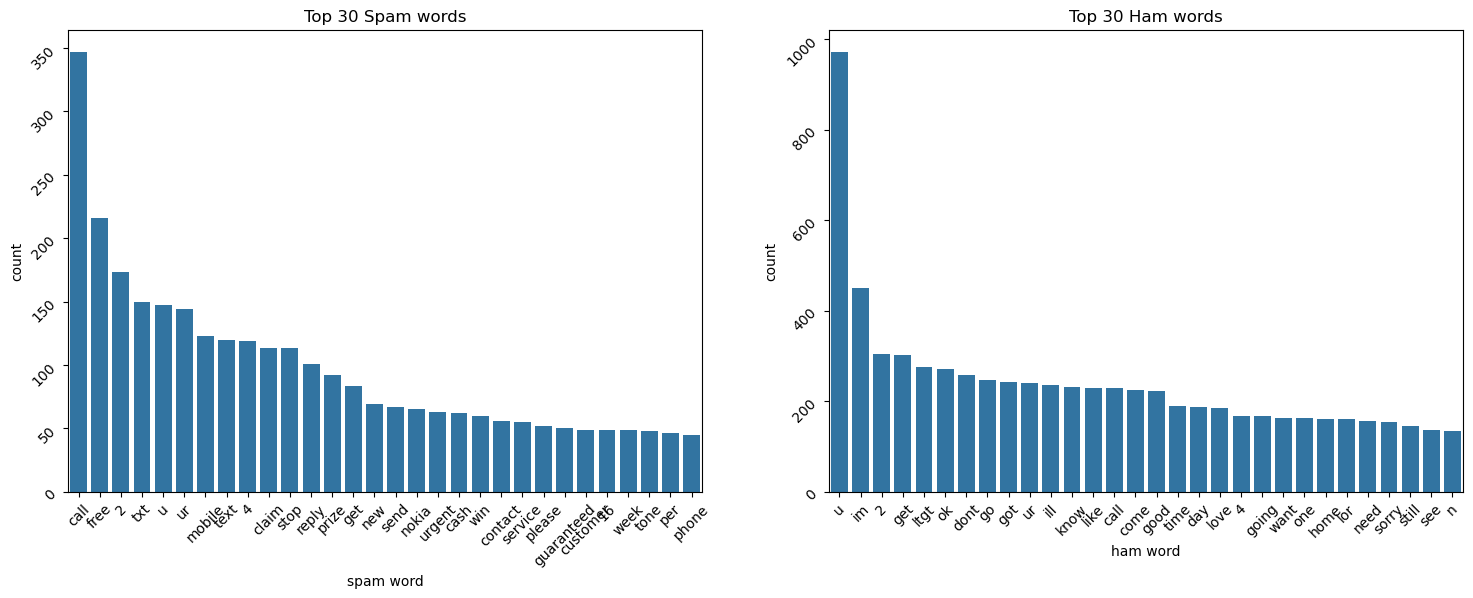

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(18, 6))
sns.barplot(x='spam word', y='count', data=df_spamwords_top30, ax=ax[0])
ax[0].set_title("Top 30 Spam words")
ax[0].tick_params(labelrotation=45)

plt.xticks(rotation='vertical')

sns.barplot(x='ham word', y='count', data=df_hamwords_top30, ax=ax[1])
ax[1].set_title("Top 30 Ham words")
ax[1].tick_params(labelrotation=45)


## 4. Vectorization

In order to be able to work with numerical values instead of words, we generally proceed to a transformation of words into **numerical** values, we talk about _'vectorization'_. One of the methods consists in encoding the words by their number of occurrences (count) or by a weighting on their frequency of appearance in the document (term frequency-inverse document frequency (TF-IDF), the more the weight is important the less the word appears).

After the vectorization of the words, we transform the text data into a matrix. As the matrix can be very large with a lot of zeros, a **sparse** matrix is used which only codes the indices and data.

The library used to perform these operations is the [scikit-learn] library (https://scikit-learn.org/stable/index.html). The documentation concerning this vectorization can be found here :
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

**Example :**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sample = ['Text processing is necessary.', 'Text processing is necessary and important.', 'Text processing is easy.']

vec_c = CountVectorizer()
vec_t = TfidfVectorizer().fit(sample)
print(vec_t.vocabulary_)

Xc = vec_c.fit_transform(sample)
Xt = vec_t.transform(sample)

{'text': 6, 'processing': 5, 'is': 3, 'necessary': 4, 'and': 0, 'important': 2, 'easy': 1}


In [ ]:
print(Xt)

In [ ]:
df_Xc = pd.DataFrame(Xc.toarray(),columns=vec_c.get_feature_names())
df_Xc

In [ ]:
df_Xt = pd.DataFrame(Xt.toarray(),columns=vec_t.get_feature_names())
df_Xt

### Application to spam and ham detection

We use the TF-IDF vectorization on the original data set

In [28]:
data['text']=data['text'].str.lower()
data['text']=data['text'].str.translate(str.maketrans('', '', string.punctuation))
data['text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: text, Length: 5572, dtype: object

In [29]:
# vectorization using TF-IDF
tfidf_transformer = TfidfVectorizer(analyzer = tokenise_and_delete_stop_words).fit(data['text'])

# build vocabulary
tfidf_data = tfidf_transformer.transform(data['text'])
tfidf_data.shape

(5572, 9427)

Separate data:
- one part for learning
- a part for testing

The input data are 
- the vectorized text (tfidf_data)
- the target (spam column (0 or 1))

In [30]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
      train_test_split(tfidf_data, data['class'], test_size=0.3)

In [31]:
data_tfidf_train.shape, data_tfidf_test.shape

((3900, 9427), (1672, 9427))

## 5. Classification 

Use Naive Bayes classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 

# Learning
spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)

In [33]:
#prediction
pred_test_MNB = spam_detect_model.predict(data_tfidf_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
acc_MNB

0.958732057416268